In [ ]:
# Requirements
# pip install ultralytics matplotlib cv2 

In [ ]:
#Trained with GPU P100 on kaggle

# 1. TRAINING PHASE

## 1.1 Importing requirements

In [11]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

## 1.2 Setting up kaggle directories (OPTIONAL)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
#Just to copy the dataset from the input to the output in kaggle
!cp -r /kaggle/input/'olives-orchards-yolov8' ./datasets

## 1.3 Editing kaggle's data.yaml directing pointing

In [4]:
# just to edit the yaml file
import yaml

yaml_path = "/kaggle/working/datasets/Dataset_/data.yaml"

with open(yaml_path, "r") as f:
    data = yaml.safe_load(f)

# Fix paths (example)
data["train"] = "/kaggle/working/datasets/Dataset_/images/train"
data["val"] = "/kaggle/working/datasets/Dataset_/images/val"

with open(yaml_path, "w") as f:
    yaml.safe_dump(data, f)

print("✅ data.yaml updated")

✅ data.yaml updated


## 1.4 Configuration of the training session

In [ ]:
# --- USER CONFIG ---
CONFIG = {
    # Path to your dataset root (if you downloaded from Roboflow unzip here),
    # Expected layout for YOLO:  
    #  dataset_root/images/train, dataset_root/images/val
    #  dataset_root/labels/train, dataset_root/labels/val
    'dataset_root': "/kaggle/working/datasets/Dataset_",

    # If you prefer to use Roboflow API to download, set use_roboflow=True and add your API key.
    'use_roboflow': False,
    'roboflow_api_key': '<PASTE_YOUR_ROBOFLOW_API_KEY_OR_SET_ENV_VAR>',
    'roboflow_project_id': '<WORKSPACE/PROJECT_NAME_OR_NUM>',
    'roboflow_version': '1',

    # YOLOv8 base weights to start from. Options: 'yolov8n.pt', 'yolov8s.pt', 'yolov8m.pt', 'yolov8l.pt', 'yolov8x.pt'
    'pretrained_weights': 'yolov8m-seg.pt',

    # Training hyperparams
    'epochs': 150,
    'batch': 4,
    'accumulate':2,
    'imgsz': 640,
    'learnrate': 0.0005,
    'Optimizer': 'AdamW',
    'project':'orchard-yolo',
     'patience': 30,
    # 'device': 0,  # set to 0 for first GPU; set to 'cpu' to force CPU
    'exp_name': 'yolov8_cust_exp',
}

# Quick check print
print('CONFIG summary:')
for k, v in CONFIG.items():
    print(f' - {k}: {v}')

## 1.5 Variables assignments

In [ ]:
# %%

MODEL = CONFIG['pretrained_weights']
EPOCHS = CONFIG['epochs']
BATCH = CONFIG['batch']
IMGSZ = CONFIG['imgsz']
# DEVICE = CONFIG['device'] 
EXP_NAME = CONFIG['exp_name']
DATA = CONFIG['dataset_root'] + '/data.yaml'
LRate = CONFIG["learnrate"]
Optim = CONFIG['Optimizer']
accumulate= CONFIG['accumulate']
Patience = CONFIG['patience']
label_smoothing = 0.1
print(f'Loading model {MODEL}...')
model = YOLO(MODEL)

Loading model yolov8m-seg.pt...


In [ ]:
# Check if the directory/file is existent (kaggle)
!ls -R /kaggle/input/olive-tree-yolov8

## 1.6 Let's GO!

Reminder: Train with Ultralytics YOLOv8 This cell runs the training.Go back to CONFIG Adjust epochs, batch, and imgsz etc. as needed.

In [ ]:
# Train. The .train() call will create a runs/ folder with the experiment outputs.
# If you want to resume from a checkpoint, set model = YOLO('path/to/last.pt')
print('Starting training...')
_ = model.train(
    data=DATA,
    epochs=EPOCHS,
    imgsz=IMGSZ,
    batch=BATCH,
    lr0 = LRate,
    # accumulate = accumulate,
    optimizer = Optim,
    # label_smoothing=label_smoothing,
    patience = Patience,
    # device=DEVICE,
    name=EXP_NAME,
    hsv_h=0.015,   # Hue shift
    hsv_s=0.7,     # Saturation gain
    hsv_v=0.4,     # Brightness gain
    flipud=0.5,    # Vertical flip
    fliplr=0.5,    # Horizontal flip
    scale=0.9,      # Random scale
    augment = True
    # deterministic=False
)

## 1.7 Ploting results if needed


Locate the latest results.csv and preview it

In [29]:
import glob
import pandas as pd
from pathlib import Path

# Find all results.csv files under runs/
results_csvs = list(Path('runs').rglob('results.csv'))
if not results_csvs:
    print('No results.csv found under runs If training didnt run or you used a custom save dir, check ultralytics output.')
else:
    results_csv = max(results_csvs, key=lambda p: p.stat().st_mtime)
    print('Using results file:', results_csv)
    df = pd.read_csv(results_csv)
    print('\nColumns present in results.csv:')
    print(df.columns.tolist())
    display(df.head())

Using results file: runs/segment/yolov8_cust_exp4/results.csv

Columns present in results.csv:
['epoch', 'time', 'train/box_loss', 'train/seg_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'metrics/precision(M)', 'metrics/recall(M)', 'metrics/mAP50(M)', 'metrics/mAP50-95(M)', 'val/box_loss', 'val/seg_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


,epoch,time,train/box_loss,train/seg_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),...,metrics/recall(M),metrics/mAP50(M),metrics/mAP50-95(M),val/box_loss,val/seg_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,5.80935,1.47436,2.33352,1.04167,1.04035,0.89832,0.84932,0.92035,0.65287,...,0.84932,0.91818,0.46574,0.91541,4.01123,0.76683,0.94889,0.083085,0.000085,0.000085
1,2,12.03520,1.35350,1.68651,0.90580,1.02972,0.85699,0.90411,0.92434,0.67105,...,0.89726,0.91909,0.52644,0.89341,2.19875,0.76507,0.94996,0.065174,0.000174,0.000174
2,3,18.44320,1.51660,1.83630,1.02351,1.02939,0.81713,0.93836,0.91074,0.66512,...,0.93836,0.91074,0.57235,0.93422,2.00770,0.77286,0.96230,0.047261,0.000262,0.000262
3,4,24.86110,1.35310,1.74284,0.94119,1.01386,0.79168,0.91096,0.89908,0.64584,...,0.89258,0.89540,0.55383,0.99406,1.60244,0.86207,0.96412,0.029348,0.000348,0.000348
4,5,30.97920,1.31046,1.65385,0.93424,1.02830,0.81190,0.86301,0.88384,0.58713,...,0.86301,0.87882,0.52458,1.06288,1.41161,0.98710,0.99254,0.011433,0.000433,0.000433


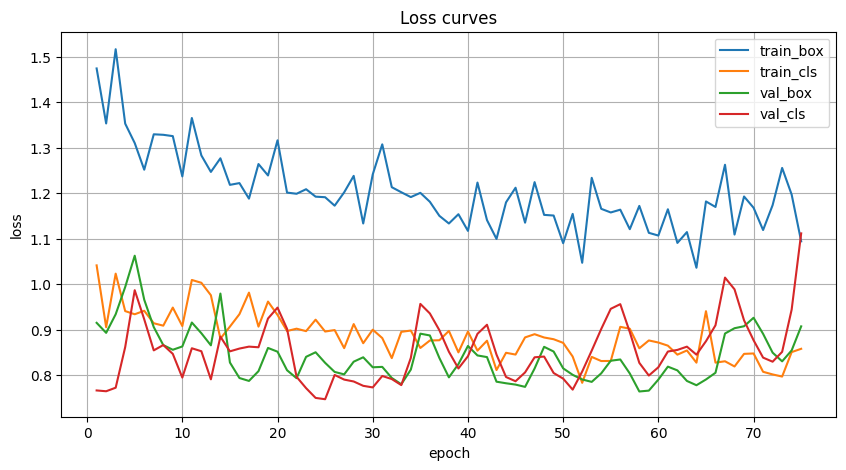

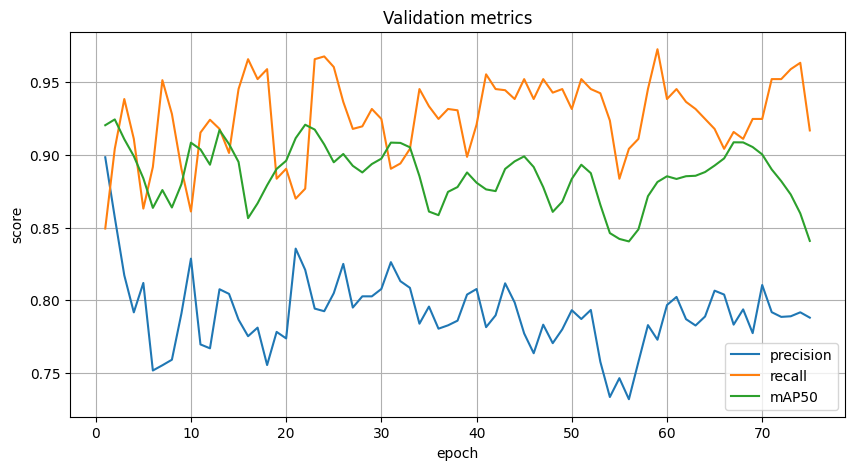

In [30]:
import matplotlib.pyplot as plt

if 'df' in globals():
    # Helper to try multiple column name variants
    def col_exists(*candidates):
        for c in candidates:
            if c in df.columns:
                return c
        return None

    # Losses
    train_box = col_exists('train/box_loss', 'train/box')
    train_cls = col_exists('train/cls_loss', 'train/cls')
    train_obj = col_exists('train/obj_loss', 'train/obj')
    val_box = col_exists('val/box_loss', 'val/box')
    val_cls = col_exists('val/cls_loss', 'val/cls')
    val_obj = col_exists('val/obj_loss', 'val/obj')

    # Metrics
    prec = col_exists('metrics/precision', 'metrics/precision(B)', 'metrics/precision(M)', 'metrics/precision(B)')
    rec = col_exists('metrics/recall', 'metrics/recall(B)', 'metrics/recall(M)')
    map50 = col_exists('metrics/mAP_0.5', 'metrics/mAP50', 'metrics/mAP50(B)', 'metrics/mAP50-95')
    map5095 = col_exists('metrics/mAP_0.5:0.95', 'metrics/mAP_0.5:0.95', 'metrics/mAP50-95', 'metrics/mAP_0.5-0.95')

    epochs = df['epoch'] if 'epoch' in df.columns else list(range(len(df)))

    # Plot losses
    plt.figure(figsize=(10, 5))
    for label, col in [('train_box', train_box), ('train_cls', train_cls), ('train_obj', train_obj), ('val_box', val_box), ('val_cls', val_cls), ('val_obj', val_obj)]:
        if col:
            plt.plot(epochs, df[col], label=label)
    plt.title('Loss curves')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot metrics (precision / recall / mAP)
    plt.figure(figsize=(10, 5))
    plotted = False
    for label, col in [('precision', prec), ('recall', rec), ('mAP50', map50), ('mAP50-95', map5095)]:
        if col:
            plt.plot(epochs, df[col], label=label)
            plotted = True
    if plotted:
        plt.title('Validation metrics')
        plt.xlabel('epoch')
        plt.ylabel('score')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print('No metric columns (precision/recall/mAP) found in results.csv to plot.')


## 1.8 Run a formal validation pass with the best weights and get structured metrics
 This uses `model.val()` which returns a `Results` or similar object containing metrics.

In [ ]:
# Load best.pt from the experiment (Ultralytics saves best.pt in runs/*/weights)
from pathlib import Path

best_weights = None
runs_train = list(Path('runs').rglob('weights'))
if runs_train:
    # find best.pt among weights dirs
    best_candidates = list(Path('runs').rglob('weights/best.pt'))
    if best_candidates:
        best_weights = max(best_candidates, key=lambda p: p.stat().st_mtime)

if best_weights is None:
    print('Could not find best.pt automatically. You can pass the path to your trained weights in the variable `best_weights` and re-run this cell.')
else:
    print('Using best weights:', best_weights)
    val_model = YOLO(str(best_weights))
    print('Running validation (this will run the COCO-style evaluator on the validation set) ...')
    val_results = val_model.val(data=str(DATA), batch=CONFIG['batch'])
    print('\nValidation summary (object):')
    print(val_results)
    # If val_results has accessible attributes, try to print maps
    try:
        # val_results may be a Results object or dict-like
        if hasattr(val_results, 'box'):
            print('mAP50-95:', getattr(val_results.box, 'map', None))
            print('mAP50:', getattr(val_results.box, 'map50', None))
    except Exception:
        pass

## 2 INFERENCE/PREDICTION PHASE

## 2.1 Quick inference 

### 2.1.1 Option 1 (Inference in the validation dataset)

In [ ]:
DATA_ROOT = Path("/kaggle/input/olive-tree-yolov8/Dataset")

In [ ]:
sample_image = None
# Try to find an image in the val set
val_images = list((DATA_ROOT / 'images' / 'val').glob('**/*.*')) if (DATA_ROOT / 'images' / 'val').exists() else []
if val_images:
    sample_image = str(val_images[0])

if sample_image:
    print('Running inference on sample image:', sample_image)
    preds = val_model.predict(source=sample_image, save=True)  # saves to runs/predict/exp
    print('Pred saved to runs/predict/ (check the folder created)')
else:
    print('No sample image found in val/ to run inference on.')

In [ ]:
# Copy best weights to working dir
import shutil

shutil.copy(
    "/kaggle/working/olive_tree_yolo/weights/best.pt",
    "/kaggle/working/best.pt"
)


In [ ]:
# Zip the working directory to download the trained model and results
#!zip -r yolov8_custom_exp4.zip /kaggle/working/


### 2.1.2 Option 2 (Inference in a single random image)

In [ ]:
from pathlib import Path

# Example: absolute path
file_path = Path("F:\STAGE\DRONE_GLOBE\DATA\Benslimane - Olivier - 08082024_transparent_mosaic_group1.tif")

# Example: relative path
#file_path = Path("dataset/data.yaml")

# Check if file exists
if file_path.exists():
    print("File found ✅")
else:
    print("File not found ❌")
    print(f"Please check the path: {file_path}")

# Predict
from ultralytics import YOLO
model = YOLO(r"F:\STAGE\DRONE_GLOBE\Olivier_yolo\Dataset\best.pt")  # load a custom model
results = model.predict(source=file_path, conf=0.25, save=True, save_txt=True, save_conf=True, project="runs/predict", name="exp", exist_ok=True)


## 2.2 Inference on an orthomosaic image (large image)

## 2.2.2 Bounding box

### What This Script Does

STEP1: 

- Tiles orthomosaic into overlapping patches (with padding if edges are smaller).

- Runs YOLOv8 inference on each patch.

- Converts detections back into absolute coordinates of the full orthomosaic.

- Applies a simple NMS (Non-Max Suppression) across overlapping tiles.

- Saves all detections to a .txt file with:
    class_id x_center y_center width height confidence

In [ ]:
import os
import cv2
import math
import torch
import numpy as np
from ultralytics import YOLO

# =========================
# CONFIG
# =========================
ORTHO_PATH = "F:\STAGE\DRONE_GLOBE\DATA\Benslimane - Olivier - 08082024_transparent_mosaic_group1.tif"   # input orthomosaic
TILE_SIZE = 1024                         # patch size
OVERLAP = 0.2                            # 20% overlap
OUTPUT_DIR = "inference_patches"
MODEL_PATH = "best.pt"                   # trained YOLOv8 model
RESULTS_FILE = "merged_detections.txt"   # save final detections

os.makedirs(OUTPUT_DIR, exist_ok=True)

# =========================
# 1. Tile the orthomosaic
# =========================
def tile_image(img, tile_size=1024, overlap=0.2):
    h, w, _ = img.shape
    step = int(tile_size * (1 - overlap))
    tiles = []

    for y in range(0, h, step):
        for x in range(0, w, step):
            x_end = min(x + tile_size, w)
            y_end = min(y + tile_size, h)
            tile = img[y:y_end, x:x_end]

            # Pad if smaller than TILE_SIZE
            pad_x = tile_size - (x_end - x)
            pad_y = tile_size - (y_end - y)
            tile = cv2.copyMakeBorder(tile, 0, pad_y, 0, pad_x, cv2.BORDER_CONSTANT, value=(0,0,0))

            tile_name = f"tile_{x}_{y}.jpg"
            cv2.imwrite(os.path.join(OUTPUT_DIR, tile_name), tile)
            tiles.append((tile_name, x, y))
    
    return tiles, w, h

# Load orthomosaic
orthomosaic = cv2.imread(ORTHO_PATH)
tiles, full_w, full_h = tile_image(orthomosaic, TILE_SIZE, OVERLAP)
print(f"✅ Tiled orthomosaic into {len(tiles)} patches")

# =========================
# 2. Inference on patches
# =========================
model = YOLO(MODEL_PATH)
all_detections = []

for tile_name, x_offset, y_offset in tiles:
    tile_path = os.path.join(OUTPUT_DIR, tile_name)
    results = model(tile_path, imgsz=TILE_SIZE, conf=0.25)  # adjust conf threshold
    
    for r in results:
        if r.boxes is None:
            continue
        for box in r.boxes.xywhn.cpu().numpy():  # normalized [x_center, y_center, w, h]
            cls = int(r.boxes.cls.cpu().numpy()[0])
            conf = float(r.boxes.conf.cpu().numpy()[0])
            
            # Convert from normalized patch coords to orthomosaic coords
            x_c, y_c, w, h = box
            abs_x = x_c * TILE_SIZE + x_offset
            abs_y = y_c * TILE_SIZE + y_offset
            abs_w = w * TILE_SIZE
            abs_h = h * TILE_SIZE
            
            all_detections.append([cls, conf, abs_x, abs_y, abs_w, abs_h])

print(f"✅ Collected {len(all_detections)} raw detections")

# =========================
# 3. Merge detections (NMS)
# =========================
def iou(box1, box2):
    # box format: [x_c, y_c, w, h]
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    x1_min, y1_min = x1 - w1/2, y1 - h1/2
    x1_max, y1_max = x1 + w1/2, y1 + h1/2
    x2_min, y2_min = x2 - w2/2, y2 - h2/2
    x2_max, y2_max = x2 + w2/2, y2 + h2/2

    inter_xmin = max(x1_min, x2_min)
    inter_ymin = max(y1_min, y2_min)
    inter_xmax = min(x1_max, x2_max)
    inter_ymax = min(y1_max, y2_max)

    inter_area = max(0, inter_xmax - inter_xmin) * max(0, inter_ymax - inter_ymin)
    area1 = w1 * h1
    area2 = w2 * h2
    union = area1 + area2 - inter_area
    return inter_area / union if union > 0 else 0

def nms(detections, iou_thresh=0.5):
    detections = sorted(detections, key=lambda x: x[1], reverse=True)  # sort by confidence
    keep = []

    while detections:
        best = detections.pop(0)
        keep.append(best)
        detections = [d for d in detections if iou(best[2:], d[2:]) < iou_thresh]
    return keep

final_dets = nms(all_detections, iou_thresh=0.5)
print(f"✅ After NMS: {len(final_dets)} final detections")

# =========================
# 4. Save results
# =========================
with open(RESULTS_FILE, "w") as f:
    for det in final_dets:
        cls, conf, x, y, w, h = det
        f.write(f"{cls} {conf:.2f} {x:.1f} {y:.1f} {w:.1f} {h:.1f}\n")

print(f"✅ Saved merged detections to {RESULTS_FILE}")


STEP 2:

- Get YOLO detections in pixel coordinates (we already have them from the previous pipeline).

- Format: [cls, conf, x_center, y_center, width, height] in pixels.

- Convert pixel coordinates to geospatial coordinates using the orthomosaic transform from rasterio.

- Convert bounding boxes into polygons (or rectangles).

- Save all polygons as a .gpkg layer using geopandas.

In [ ]:
import rasterio
from rasterio.transform import from_origin
import geopandas as gpd
from shapely.geometry import box
import pandas as pd

# ----------------------------
# CONFIG
# ----------------------------
ORTHO_PATH = "F:\STAGE\DRONE_GLOBE\DATA\Benslimane - Olivier - 08082024_transparent_mosaic_group1.tif"  # input orthomosaic
DETECTIONS_FILE = "merged_detections.txt"  # output from YOLO pipeline
GPKG_FILE = "olive_trees.gpkg"
LAYER_NAME = "olive_trees"

# ----------------------------
# 1. Read orthomosaic for geotransform
# ----------------------------
with rasterio.open(ORTHO_PATH) as src:
    transform = src.transform
    crs = src.crs

# ----------------------------
# 2. Read detections
# ----------------------------
detections = pd.read_csv(DETECTIONS_FILE, sep=" ", header=None,
                         names=["class", "conf", "x_center", "y_center", "width", "height"])

geoms = []
for idx, row in detections.iterrows():
    x_c, y_c, w, h = row["x_center"], row["y_center"], row["width"], row["height"]
    
    # Convert pixel coords to bounding box corners
    x_min = x_c - w/2
    x_max = x_c + w/2
    y_min = y_c - h/2
    y_max = y_c + h/2

    # Convert to geospatial coordinates
    x_min_geo, y_min_geo = rasterio.transform.xy(transform, int(y_min), int(x_min), offset='center')
    x_max_geo, y_max_geo = rasterio.transform.xy(transform, int(y_max), int(x_max), offset='center')

    # Create shapely polygon (rectangle)
    geom = box(x_min_geo, y_min_geo, x_max_geo, y_max_geo)
    geoms.append(geom)

# ----------------------------
# 3. Create GeoDataFrame
# ----------------------------
gdf = gpd.GeoDataFrame(detections, geometry=geoms, crs=crs)

# ----------------------------
# 4. Save to GeoPackage
# ----------------------------
gdf.to_file(GPKG_FILE, layer=LAYER_NAME, driver="GPKG")

print(f"✅ Saved {len(gdf)} trees to {GPKG_FILE}")


## 2.2.3 Segmentation

In [ ]:
import os
import cv2
import numpy as np
from ultralytics import YOLO
import rasterio
from shapely.geometry import Polygon
from shapely.ops import unary_union
import geopandas as gpd

# =========================
# CONFIG
# =========================
ORTHO_PATH = r"F:\STAGE\DRONE_GLOBE\Olivier_yolo\Olive_final_pipeline\Images_to_predict\Orthomosaic_orchards.tif"
TILE_SIZE = 1024
OVERLAP = 0.2
MODEL_PATH = "best_olives_yolov8mseg.pt"     # YOLOv8 segmentation model
OUTPUT_GPKG = "olive_trees_cleaned_minarea_0.5.gpkg"
LAYER_NAME = "olive_trees"

MIN_AREA = 0.2   # m² minimum tree crown area (to remove noise)
SIMPLIFY_TOL = 0.05  # meters; adjust for smoothing boundaries

# =========================
# 1. Tile the orthomosaic
# =========================
def tile_image(img, tile_size=TILE_SIZE, overlap=OVERLAP):
    h, w, _ = img.shape
    step = int(tile_size * (1 - overlap))
    tiles = []

    for y in range(0, h, step):
        for x in range(0, w, step):
            x_end = min(x + tile_size, w)
            y_end = min(y + tile_size, h)
            tile = img[y:y_end, x:x_end]

            # Pad if smaller than TILE_SIZE
            pad_x = tile_size - (x_end - x)
            pad_y = tile_size - (y_end - y)
            tile = cv2.copyMakeBorder(tile, 0, pad_y, 0, pad_x, cv2.BORDER_CONSTANT, value=(0,0,0))

            tiles.append((tile, x, y))
    return tiles

# Load orthomosaic (array only for tiling)
orthomosaic = cv2.imread(ORTHO_PATH)
tiles = tile_image(orthomosaic)
print(f"✅ Tiled orthomosaic into {len(tiles)} patches")

# =========================
# 2. Load YOLOv8-seg model
# =========================
model = YOLO(MODEL_PATH)
all_polygons = []

# =========================
# 3. Inference + masks → polygons
# =========================
for tile_img, x_offset, y_offset in tiles:
    # Ensure tile is 3-channel (RGB)
    if tile_img.shape[2] == 4:
        tile_img = cv2.cvtColor(tile_img, cv2.COLOR_BGRA2BGR)
    results = model(tile_img, imgsz=TILE_SIZE, conf=0.25, device='cuda')

    for r in results:
        if r.masks is None:
            continue
        for mask_poly in r.masks.xy:
            poly_coords = [(x + x_offset, y + y_offset) for x, y in mask_poly]
            all_polygons.append(poly_coords)

print(f"✅ Collected {len(all_polygons)} raw polygons from all tiles")

# =========================
# 4. Convert to geospatial polygons
# =========================
with rasterio.open(ORTHO_PATH) as src:
    transform = src.transform
    crs = src.crs

geoms = []
for coords in all_polygons:
    if len(coords) < 4:
        continue  # Skip invalid polygons
    geo_coords = [rasterio.transform.xy(transform, int(y), int(x), offset='center') for x, y in coords]
    poly = Polygon(geo_coords)
    if poly.is_valid and poly.area > MIN_AREA:   # filter tiny/noisy polygons
        poly = poly.simplify(SIMPLIFY_TOL, preserve_topology=True)  # optional smoothing
        geoms.append(poly)

print(f"✅ Kept {len(geoms)} cleaned polygons (after area + simplify filter)")

# =========================
# 5. Merge overlapping polygons
# =========================
print("🔄 Merging overlapping polygons...")
merged = unary_union(geoms)

# Convert merged result back to list of polygons (could be MultiPolygon)
if merged.geom_type == "Polygon":
    merged_polys = [merged]
elif merged.geom_type == "MultiPolygon":
    merged_polys = list(merged.geoms)
else:
    merged_polys = []

print(f"✅ After merging: {len(merged_polys)} final tree crowns")

# =========================
# 6. Save to GeoPackage
# =========================
gdf = gpd.GeoDataFrame(geometry=merged_polys, crs=crs)
gdf.to_file(OUTPUT_GPKG, layer=LAYER_NAME, driver="GPKG")

print(f"🎯 Saved {len(gdf)} tree polygons to {OUTPUT_GPKG}")
